In [1]:
!pip install snscrape

In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd #working with relational data
import nltk
#from nltk.corpus import movie_reviews
import tweepy                  #for accessing twitter API
from textblob import TextBlob  #processing textual data
from wordcloud import WordCloud  #frequency/importance of words in text data
import numpy as np              #for arrays and matrices
import re                        #regular expressions
import matplotlib.pyplot as plt   #for plotting
plt.style.use('seaborn-talk');
nltk.download('stopwords') # download stopwords
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.probability import FreqDist
from collections import Counter
import string
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob.sentiments import NaiveBayesAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# SCRAPPING AMAZON DATA TWEETS

In [3]:
query = "(to:Amazon) until:2023-04-01 since:2022-01-01"
tweets = []
limit = 30000
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
     if len(tweets) == limit:
        break
     else:
        tweets.append([tweet.date, tweet.user.username, tweet.rawContent])

In [4]:
data = pd.DataFrame(tweets, columns=['Date', 'User', 'text'])

# STORE TWEETS IN AMAZONTWEETS.CSV

In [5]:
data.to_csv('Amazontweets.csv')

# load data

In [6]:
amazon_data = pd.read_csv('Amazontweets.csv')

In [7]:
amazon_data.head(50)

,Unnamed: 0,Date,User,text
0,0,2023-03-31 23:49:32+00:00,cwsouthworth,@amazon @AmazonHelp @PrimeVideo \n\nWhen I buy...
1,1,2023-03-31 23:45:42+00:00,Puddingshorts,@amazon The reason people pay over $120 a year...
2,2,2023-03-31 23:43:40+00:00,mnstevet,@amazon will today's delivery be the 3rd in a ...
3,3,2023-03-31 23:23:55+00:00,Puddingshorts,@amazon Dress shoes for my sons prom tomorrow ...
4,4,2023-03-31 23:22:27+00:00,Corsair_Lyfe,@amazon y’all delivering in Tornadoes now? Y’a...
5,5,2023-03-31 23:16:29+00:00,SRCREAT39941598,@amazon I am ordered boat headfone but recive ...
6,6,2023-03-31 22:41:48+00:00,NHKaze,@amazon WHEN I CATCH YOU
7,7,2023-03-31 22:41:20+00:00,philsurles,@amazon I've never received a package sent thr...
8,8,2023-03-31 22:33:00+00:00,trtr203040,@amazon 定期おトク便のシステムがずっと変です。変な動きをしています。注文してない注文...
9,9,2023-03-31 22:27:18+00:00,ssusannss55,@amazon Hi can you get rid of that horrible Pr...


# DATA CLEANING

In [10]:
stopwords.words('english')

def cleanText(text):
  text = re.sub(r'@[a-zA-z0-9]+', '', text) # remove @mentions
  text = re.sub(r'#', '', text)# getting rid of #
  text = re.sub(r'RT[\s]+', '', text) #removes RT(retweets)
  text = re.sub(r'https?:\/\/\S+', '', text)# getting rid of hyperlinks
  text = text.encode('ascii', 'ignore').decode('ascii')#removing non-ascii characters'
  text = re.sub(r'[^\w\s]', '', text) # remove punctuation #can use [^\w\s] or [‘’“”…,] or !"#\$%&\'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`{\|}~ #[^\w\s] removes any character that is not a letter, digit, or underscore) or whitespace.^ means is not
  text = text.lower() #convert text to lowercase
  text = re.sub(r'[^a-zA-Z\s]', '', text) #remove numbers and keep text/alphabet only
  text = re.sub(r'\n\n', '', text) # remove \n\n
  text = ' '.join([word for word in text.split() if word not in stopwords.words('english')]) # remove stopwords 

  return(text)

amazon_data['text'] = amazon_data['text'].apply(cleanText)

In [12]:
#show the cleaned text
amazon_data

,Unnamed: 0,Date,User,text
0,0,2023-03-31 23:49:32+00:00,cwsouthworth,buy something like video sd dont crop dont str...
1,1,2023-03-31 23:45:42+00:00,Puddingshorts,reason people pay year service rely order make...
2,2,2023-03-31 23:43:40+00:00,mnstevet,today delivery rd row delayed next day wtf pri...
3,3,2023-03-31 23:23:55+00:00,Puddingshorts,dress shoe son prom tomorrow ordered wednesday...
4,4,2023-03-31 23:22:27+00:00,Corsair_Lyfe,yall delivering tornado yall dont play aint ne...
...,...,...,...,...
29995,29995,2022-12-05 12:55:20+00:00,AlphaWulfGaming,remove snap ebt eligible filter search pane am...
29996,29996,2022-12-05 12:53:18+00:00,Diamondkfarms,prime worth paying month standard delivery tim...
29997,29997,2022-12-05 12:52:50+00:00,lanitatb,love prime completely unacceptable package arr...
29998,29998,2022-12-05 12:48:01+00:00,Anadriana_,decepcionada por mi compra de la cuarta hoja d...


# LEMMATIZATION

In [11]:
def lemmatize_text(text):
    """
    Lemmatizes the input text using WordNetLemmatizer from NLTK library.
    
    Args:
    text (str): The input text to be lemmatized.
    
    Returns:
    str: The lemmatized text.
    """
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text)])
    return lemmatized_text
amazon_data['text'] = amazon_data['text'].apply(lemmatize_text)

In [13]:
amazon_data

,Unnamed: 0,Date,User,text
0,0,2023-03-31 23:49:32+00:00,cwsouthworth,buy something like video sd dont crop dont str...
1,1,2023-03-31 23:45:42+00:00,Puddingshorts,reason people pay year service rely order make...
2,2,2023-03-31 23:43:40+00:00,mnstevet,today delivery rd row delayed next day wtf pri...
3,3,2023-03-31 23:23:55+00:00,Puddingshorts,dress shoe son prom tomorrow ordered wednesday...
4,4,2023-03-31 23:22:27+00:00,Corsair_Lyfe,yall delivering tornado yall dont play aint ne...
...,...,...,...,...
29995,29995,2022-12-05 12:55:20+00:00,AlphaWulfGaming,remove snap ebt eligible filter search pane am...
29996,29996,2022-12-05 12:53:18+00:00,Diamondkfarms,prime worth paying month standard delivery tim...
29997,29997,2022-12-05 12:52:50+00:00,lanitatb,love prime completely unacceptable package arr...
29998,29998,2022-12-05 12:48:01+00:00,Anadriana_,decepcionada por mi compra de la cuarta hoja d...


# DATA EXPLORATION

In [19]:
# View the DataFrame Information
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30000 non-null  int64 
 1   Date        30000 non-null  object
 2   User        30000 non-null  object
 3   text        30000 non-null  object
dtypes: int64(1), object(3)
memory usage: 937.6+ KB


In [20]:
# View DataFrame Statistical Summary
amazon_data.describe()

,Unnamed: 0
count,30000.000000
mean,14999.500000
std,8660.398374
min,0.000000
25%,7499.750000
50%,14999.500000
75%,22499.250000
max,29999.000000


In [21]:
#drop user column
#1 rep column and 0 rep row
amazon_data = amazon_data.drop(['User'], axis=1)
amazon_data

,Unnamed: 0,Date,text
0,0,2023-03-31 23:49:32+00:00,buy someth like video sd dont crop dont stretc...
1,1,2023-03-31 23:45:42+00:00,reason peopl pay year servic reli order make o...
2,2,2023-03-31 23:43:40+00:00,today deliveri rd row delay next day wtf prime...
3,3,2023-03-31 23:23:55+00:00,dress shoe son prom tomorrow order wednesday p...
4,4,2023-03-31 23:22:27+00:00,yall deliv tornado yall dont play aint never l...
...,...,...,...
29995,29995,2022-12-05 12:55:20+00:00,remov snap ebt elig filter search pane amazon ...
29996,29996,2022-12-05 12:53:18+00:00,prime worth pay month standard deliveri time c...
29997,29997,2022-12-05 12:52:50+00:00,love prime complet unaccept packag arriv witho...
29998,29998,2022-12-05 12:48:01+00:00,decepcionada por mi compra de la cuarta hoja d...


In [22]:
#cheecks for null elements
amazon_data.isnull()

,Unnamed: 0,Date,text
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
29995,False,False,False
29996,False,False,False
29997,False,False,False
29998,False,False,False


<AxesSubplot:>

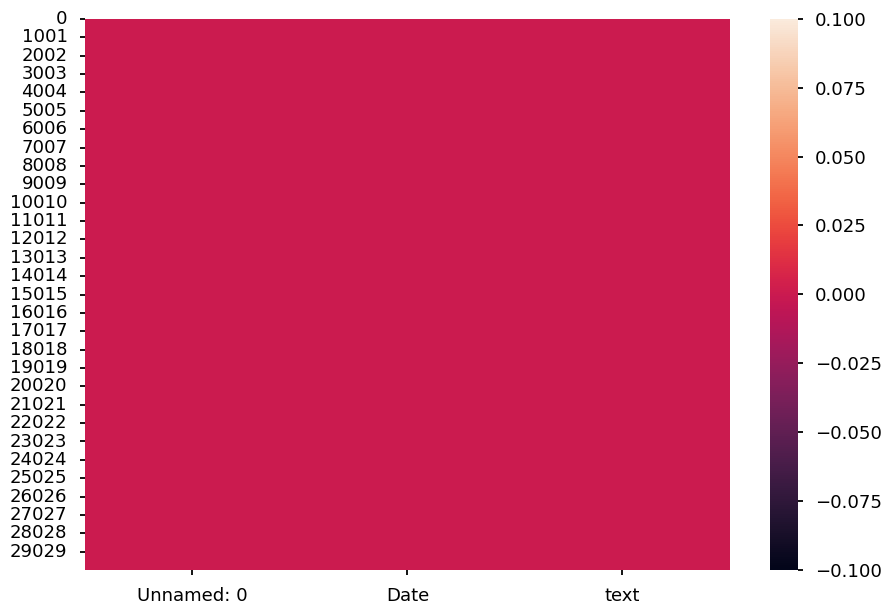

In [23]:
import seaborn as sns #for data visualization
#checks for null elements
sns.heatmap(amazon_data.isnull())

In [24]:
# Let's get the length of the verified_reviews column
amazon_data['length'] = amazon_data['text'].apply(len)
amazon_data

,Unnamed: 0,Date,text,length
0,0,2023-03-31 23:49:32+00:00,buy someth like video sd dont crop dont stretc...,111
1,1,2023-03-31 23:45:42+00:00,reason peopl pay year servic reli order make o...,140
2,2,2023-03-31 23:43:40+00:00,today deliveri rd row delay next day wtf prime...,99
3,3,2023-03-31 23:23:55+00:00,dress shoe son prom tomorrow order wednesday p...,162
4,4,2023-03-31 23:22:27+00:00,yall deliv tornado yall dont play aint never l...,91
...,...,...,...,...
29995,29995,2022-12-05 12:55:20+00:00,remov snap ebt elig filter search pane amazon ...,73
29996,29996,2022-12-05 12:53:18+00:00,prime worth pay month standard deliveri time c...,118
29997,29997,2022-12-05 12:52:50+00:00,love prime complet unaccept packag arriv witho...,151
29998,29998,2022-12-05 12:48:01+00:00,decepcionada por mi compra de la cuarta hoja d...,106


<AxesSubplot:ylabel='Frequency'>

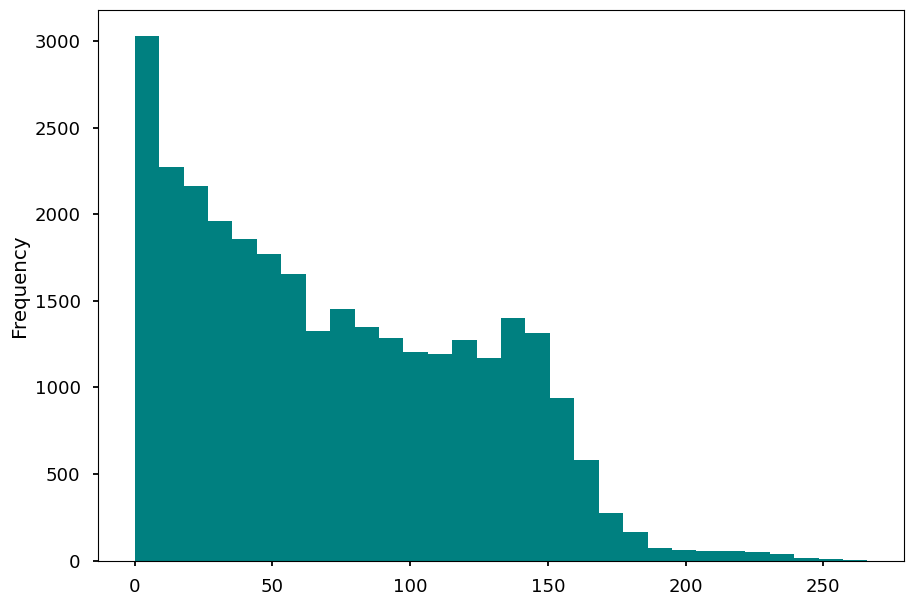

In [27]:
# Plot the histogram for the length
amazon_data['length'].plot(bins = 30, kind= 'hist', color = 'teal')

In [26]:
#The head() function to displays the shortest text:
print(amazon_data.head(1)['text'])

0    buy someth like video sd dont crop dont stretc...
Name: text, dtype: object


In [28]:
sorted_data = amazon_data.sort_values(by='length')

In [29]:
#sorts length by ascending order
amazon_data_sorted = amazon_data.sort_values(by='length', ascending=True)
print(amazon_data_sorted)

       Unnamed: 0                       Date  \
10986       10986  2023-02-10 22:24:59+00:00   
11811       11811  2023-02-07 00:58:36+00:00   
1035         1035  2023-03-25 22:27:26+00:00   
4387         4387  2023-03-12 16:01:55+00:00   
11819       11819  2023-02-07 00:10:16+00:00   
...           ...                        ...   
27585       27585  2022-12-12 19:00:46+00:00   
6543         6543  2023-03-04 17:31:56+00:00   
17577       17577  2023-01-16 03:53:17+00:00   
1374         1374  2023-03-24 05:29:18+00:00   
10652       10652  2023-02-12 17:04:40+00:00   

                                                    text  length  
10986                                                          0  
11811                                                          0  
1035                                                           0  
4387                                                           0  
11819                                                          0  
...                  

In [30]:
#The head() function to displays the shortest text:
print(sorted_data.head(1)['text'])

10986    
Name: text, dtype: object


In [31]:
#the tail() function to displays the longest text:
print(sorted_data.tail(1)['text'])

10652    lol compani inka head bol diya ground level he...
Name: text, dtype: object


In [32]:
# Apply the describe method to get statistical summary
amazon_data.describe()

,Unnamed: 0,length
count,30000.000000,30000.000000
mean,14999.500000,72.249933
std,8660.398374,52.107515
min,0.000000,0.000000
25%,7499.750000,27.000000
50%,14999.500000,64.000000
75%,22499.250000,115.000000
max,29999.000000,266.000000


In [33]:
#create a function to get subjectivity i.e how opiniated an opinion is
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to get polarity i.e how positive or negative an opinion is
def getPolarity(text):
  return TextBlob(text).sentiment.polarity 

#create two columns  
amazon_data['Subjectivity'] = amazon_data['text'].apply(getSubjectivity)
amazon_data['Polarity'] = amazon_data['text'].apply(getPolarity)

amazon_data

,Unnamed: 0,Date,text,length,Subjectivity,Polarity
0,0,2023-03-31 23:49:32+00:00,buy someth like video sd dont crop dont stretc...,111,1.000000,-0.500000
1,1,2023-03-31 23:45:42+00:00,reason peopl pay year servic reli order make o...,140,1.000000,-0.500000
2,2,2023-03-31 23:43:40+00:00,today deliveri rd row delay next day wtf prime...,99,0.500000,-0.250000
3,3,2023-03-31 23:23:55+00:00,dress shoe son prom tomorrow order wednesday p...,162,0.100000,0.000000
4,4,2023-03-31 23:22:27+00:00,yall deliv tornado yall dont play aint never l...,91,0.500000,0.500000
...,...,...,...,...,...,...
29995,29995,2022-12-05 12:55:20+00:00,remov snap ebt elig filter search pane amazon ...,73,0.000000,0.000000
29996,29996,2022-12-05 12:53:18+00:00,prime worth pay month standard deliveri time c...,118,0.185417,0.077083
29997,29997,2022-12-05 12:52:50+00:00,love prime complet unaccept packag arriv witho...,151,0.600000,0.500000
29998,29998,2022-12-05 12:48:01+00:00,decepcionada por mi compra de la cuarta hoja d...,106,0.000000,0.000000


# PLOTTING WORDCLOUD

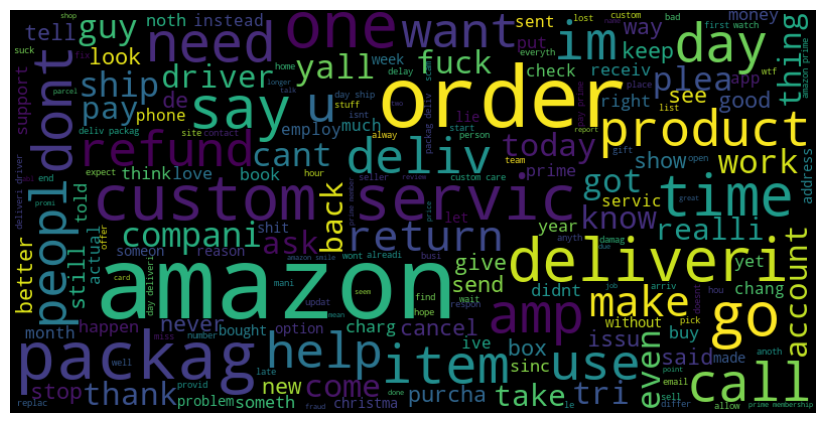

In [34]:
allWords = ' '.join(txt for txt in amazon_data['text'])
wordCloud = WordCloud(width =800, height=400, random_state=21, max_font_size =100).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [35]:
#create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score <= 0.5:
    return  'Neutral'
  else:
    return 'Positive'
amazon_data['Analysis'] = amazon_data['Polarity'].apply(getAnalysis)

#show dataframe
amazon_data

,Unnamed: 0,Date,text,length,Subjectivity,Polarity,Analysis
0,0,2023-03-31 23:49:32+00:00,buy someth like video sd dont crop dont stretc...,111,1.000000,-0.500000,Negative
1,1,2023-03-31 23:45:42+00:00,reason peopl pay year servic reli order make o...,140,1.000000,-0.500000,Negative
2,2,2023-03-31 23:43:40+00:00,today deliveri rd row delay next day wtf prime...,99,0.500000,-0.250000,Negative
3,3,2023-03-31 23:23:55+00:00,dress shoe son prom tomorrow order wednesday p...,162,0.100000,0.000000,Neutral
4,4,2023-03-31 23:22:27+00:00,yall deliv tornado yall dont play aint never l...,91,0.500000,0.500000,Neutral
...,...,...,...,...,...,...,...
29995,29995,2022-12-05 12:55:20+00:00,remov snap ebt elig filter search pane amazon ...,73,0.000000,0.000000,Neutral
29996,29996,2022-12-05 12:53:18+00:00,prime worth pay month standard deliveri time c...,118,0.185417,0.077083,Neutral
29997,29997,2022-12-05 12:52:50+00:00,love prime complet unaccept packag arriv witho...,151,0.600000,0.500000,Neutral
29998,29998,2022-12-05 12:48:01+00:00,decepcionada por mi compra de la cuarta hoja d...,106,0.000000,0.000000,Neutral


In [36]:
#print all of the positive text order from most positive text
j=1
sortedDF= amazon_data.sort_values(by=['Polarity'])#sortedDF sorts values by polarity

for i in range (0, sortedDF.shape[0]): #loops through sortedDF and prints analysis at i if positive
  if (sortedDF['Analysis'][i]=='Positive'):
    print(str(j) + ') ' + sortedDF['text'][i])
    print()
    j = j+1

1) great chanc show web web instead roadmap entir marketplac bearish af wouldv bullish launch kindl e reader rip

2) driver fresno ca area highway drive like crazi man drive multipl lane cut peopl mile per hour even pass anoth amazon truck good

3) hellanoth great packag job amazon even bother purcha

4) pl asvi whether anali member tweet kind tweet accept

5) saw amazon allow pro tran tshirt ar print sold insan tyranni shot school good idea

6) either one care call b articl know vote acquir amazon reason dont need help opinion could best invest st centuri amc apesnotleav

7) turn everyth expect especi music love book seri good

8) point pay prime year almost everyth order prim ship got day best part get night ship hey ran issu get day prime

9) realli nice inflat hair tub detox loc need get one

10) new commerci dog crate best thing ever

11) mustach ad disgust point peopl drive improv tell peopl lazi good

12) good job rai price water site take advantag philadelphia water epidem asha

In [37]:
#print all of the negative text order from most negative text
j=1
sortedDF= amazon_data.sort_values(by=['Polarity'], ascending = False)#sortedDF sorts values by polarity

for i in range (0, sortedDF.shape[0]): #loops through sortedDF and prints analysis at i if positive
  if (sortedDF['Analysis'][i]=='Negative'):
    print(str(j) + ') ' + sortedDF['text'][i])
    print()
    j = j+1

1) buy someth like video sd dont crop dont stretch video fitjust deliv sd rectangular pixelsunclear noth difficult

2) reason peopl pay year servic reli order make order havent arriv screw ship didnt arriv realli need son oh im disabl guess ill go look somewh

3) today deliveri rd row delay next day wtf prime like whenev walmart target price alon get drop prime

4) order boat headfon reciv cartoon insid box repeatedli contact amazon give resolutionveri bad custom servic amazonplea dont order amazon

5) ive never receiv packag sent time often dont receiv least last time didnt get tri deliv email separ packag deliv yesterday honestli dont think real compani

6) sick verifi account everi time log comput keep phone hip cancel lot servic week close cancel sick alexa turn whenev want also offic next

7) bullshit big corpo doesnt give shit disabl custom order deliv dont want deal complaint lazi driver either im sick ableist attitud

8) plea tell wrong compani custom servic lack luster say lea

In [38]:
#print all of the neutral text order from most neutral text
j=1
sortedDF= amazon_data.sort_values(by=['Polarity'], ascending = False)#sortedDF sorts values by polarity

for i in range (0, sortedDF.shape[0]): #loops through sortedDF and prints analysis at i if positive
  if (sortedDF['Analysis'][i]=='Neutral'):
    print(str(j) + ') ' + sortedDF['text'][i])
    print()
    j = j+1

1) dress shoe son prom tomorrow order wednesday pm sent blue soccer shin guardsnow offer go help realli min phone agentsflagr insult offer dress shoe son st prom thx

2) yall deliv tornado yall dont play aint never let prime go hope everyon stay safe protect lr

3) catch

4) 

5) hi get rid horribl prime commerci girl heavi mustach buy yellow jacket creepi paramount show everi minut

6) good lace wig rememb hear first

7) know theiv friend bought skid got beck massag pd got earbud offer refund said get full skid return stuff

8) wtf everi time go proceed top check get sorri page dog im say screw order barn nobl last time ive tri tri

9) kitchen hack

10) realli peopl absolut disgust abhorr

11) amazon deliveri driver mr delawr jone routin packag deliveri stop resid adjust amp salut american flag complet class act mr jone set wonder exampl mani god bless daili travel

12) put b movi theater product relea ape amc

13) ceo andi jassi wealth grew billion brokeass shut amazon smile penni we

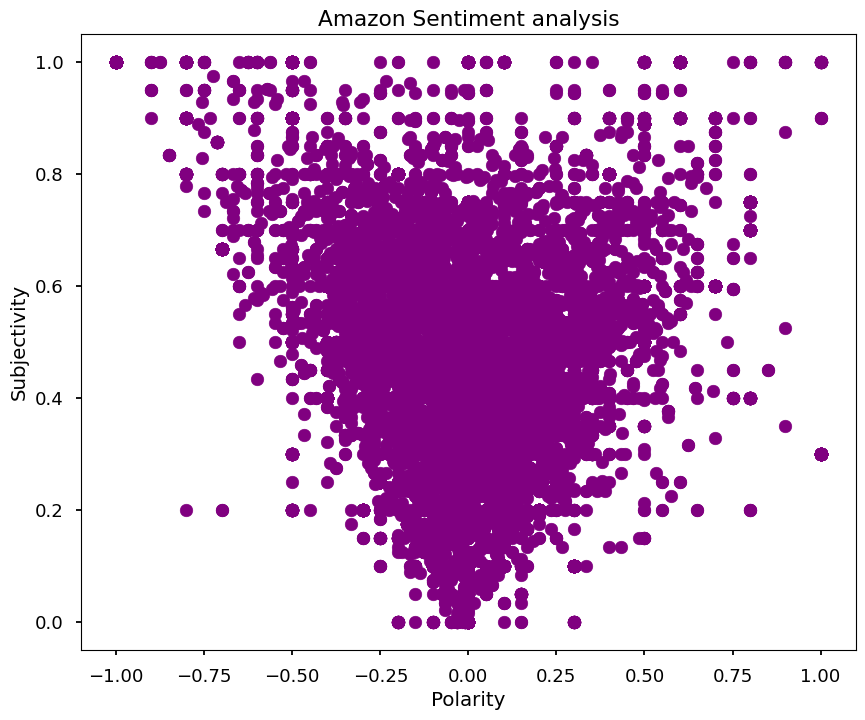

In [39]:
#plot the polarity and subjectivity
plt.figure(figsize=(10,8))
for i in range (0, amazon_data.shape[0]):
  plt.scatter(amazon_data['Polarity'][i], amazon_data['Subjectivity'][i], color='Purple')

plt.title('Amazon Sentiment analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [40]:
#get percentage of positive text
positive_amazon_data=amazon_data[amazon_data.Analysis == 'Positive']
positive_amazon_data = positive_amazon_data['text']

round( (positive_amazon_data.shape[0]/amazon_data.shape[0])*100, 1)

3.3

In [41]:
#get percentage of negative text
negative_amazon_data=amazon_data[amazon_data.Analysis == 'Negative']
negative_amazon_data = negative_amazon_data['text']

round( (negative_amazon_data.shape[0]/amazon_data.shape[0])*100, 1)

22.1

In [42]:
#get percentage of neutral text
neutral_amazon_data=amazon_data[amazon_data.Analysis == 'Neutral']
neutral_amazon_data = neutral_amazon_data['text']

round( (neutral_amazon_data.shape[0]/amazon_data.shape[0])*100, 1)

74.6

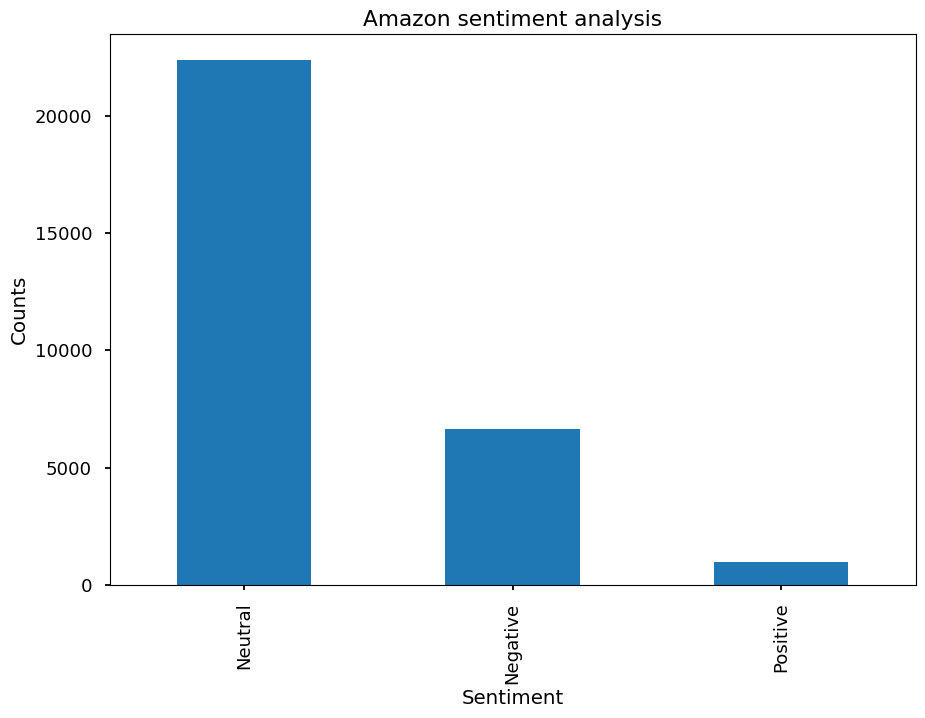

In [43]:
#show value count
amazon_data['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Amazon sentiment analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
amazon_data['Analysis'].value_counts().plot(kind= 'bar') #plots a bar graph
plt.show()

# DATA TRAINING

In [44]:
#Feature extraction using TfidfVectorizer 
#fit_transform: learns vocabulary and idf & returns document term matrix
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(amazon_data['text'])
y = amazon_data['Analysis']

In [45]:
#create training and testing sets
#test size rep % of data in test set.
#random_state controls randomization during splitting
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24000, 25054)
(24000,)
(6000, 25054)
(6000,)


In [46]:
#Uses Naives Bayes algorithm to train the model
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #classification_report
# Evaluate nb_model performance
y_pred = nb_model.predict(X_test)

accuracy_level = accuracy_score(y_test, y_pred)*100
precision_level = precision_score(y_test, y_pred, average='weighted')*100
recall_score_level= recall_score(y_test, y_pred, average='weighted')*100
f1_score_level = f1_score(y_test, y_pred, average='weighted')*100

print('Accuracy:', accuracy_level)
print('Precision:', precision_level)
print('Recall Score:', recall_score_level)
print('F1_score:', f1_score_level)

Accuracy: 77.61666666666667
Precision: 79.1849153242912
Recall Score: 77.61666666666667
F1_score: 69.79459823620692


In [48]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

SVCmodel = SVC(kernel='rbf', random_state = 1)
LRmodel = LogisticRegression(solver='liblinear', random_state=0)

In [49]:
LRmodel.fit(X,y)

LogisticRegression(random_state=0, solver='liblinear')

In [51]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
LRmodel.fit(Xtrain, ytrain)
prediction2 = LRmodel.predict(Xtest)

score2 = accuracy_score(ytest, prediction2)*100
score2

88.68333333333334

In [52]:
SVCmodel.fit(X,y)

SVC(random_state=1)

In [53]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
SVCmodel.fit(Xtrain, ytrain)
prediction3 = SVCmodel.predict(Xtest)

score3 = accuracy_score(ytest, prediction3)*100
score3

91.71666666666667

In [57]:
# Use the nb_model to make predictions on new text data
# Replace the new text in analyze_text
analyze_text = ['I hate amazon. Their services are poor']
clean_new_text = [cleanText(text) for text in analyze_text] #clean new text
lemmatized_new_text = [lemmatize_text(text) for text in clean_new_text] # Lemmatize new text
new_X = vectorizer.transform(lemmatized_new_text)
new_y = nb_model.predict(new_X)
print('The prediction is :', new_y)

The prediction is : ['Negative']


In [63]:
# Use the lRmodel to make predictions on new text data
# Replace the new text in analyze_text
analyze_text = ['I enjoy shopping at amazon.']
clean_new_text = [cleanText(text) for text in analyze_text] #clean new text
lemmatized_new_text = [lemmatize_text(text) for text in clean_new_text] # Lemmatize new text
new_X = vectorizer.transform(lemmatized_new_text)
new_y = LRmodel.predict(new_X)
print('The prediction is :', new_y)

The prediction is : ['Neutral']


In [64]:
# Use the SVCmodel to make predictions on new text data
# Replace the new text in analyze_text
analyze_text = ['I shop at amazon. Sometimes their services are good and at other times they are bad.']
clean_new_text = [cleanText(text) for text in analyze_text] #clean new text
lemmatized_new_text = [lemmatize_text(text) for text in clean_new_text] # Lemmatize new text
new_X = vectorizer.transform(lemmatized_new_text)
new_y = SVCmodel.predict(new_X)
print('The prediction is :', new_y)

The prediction is : ['Positive']
